<a href="https://colab.research.google.com/github/JPaivaCarvalho/Portfolio/blob/main/Relax_Predicting_User_Adoption_Takehome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Relax](https://raw.githubusercontent.com/interviewquery/takehomes/relax_1/relax_1/logo.png)



# 📘 INTRODUCTION

This report analyzes data provided by the fictional company **Relax Inc.**, in the context of a practical Data Analytics challenge.  
The challenge is available at [Interview Query](https://www.interviewquery.com/).

Two CSV files were provided:

- `takehome_users.csv`: contains information about 12,000 users registered over the past two years, including account creation method, creation date, last login, and marketing preferences.
- `takehome_user_engagement.csv`: contains a log of each day a user logged into the platform.


The data has the following two tables:

1.  A user table ( `takehome_users.csv`) with data on 12,000 users who
    signed up for the product in the last two years. This table
    includes:

    -   `name`: the user's name

    -   `object_id`: the user's id

    -   `email`: email address

    -   `creation_source`: how their account was created. This takes
        on one of 5 values:
        - `PERSONAL_PROJECTS`: invited to join another user's personal workspace
        - `GUEST_INVITE`: invited to an organization as a guest (limited permissions)
        - `ORG_INVITE`: invited to an organization (as a full member)
        - `SIGNUP`: signed up via the website
        - `SIGNUP_GOOGLE_AUTH`: signed up using Google Authentication (using a Google email account for their login id)

-   `creation_time`: when they created their account

-   `last_session_creation_time`: unix time_stamp of last login

-   `opted_in_to_mailing_list`: whether they have opted into receiving
    marketing emails

-   `enabled_for_marketing_drip`: whether they are on the regular
    marketing email drip

-   `org_id`: the organization (group of users) they belong to

-   `invited_by_user_id`: which user invited them to join (if
    applicable).

2.  A usage summary table ( `takehome_user_engagement.csv` ) that has a
    row for each day that a user logged into the product.

# ❓ ASKING QUESTIONS

Through exploratory data analysis (EDA) and predictive modeling techniques, this project seeks to answer two core questions:

- **Who are the adopted users?**
- **Which factors contribute most to predicting user adoption?** **texto em negrito**

**Note:** Defining an _“adopted user”_ as a user who has logged into the product on three separate days in at least one seven-­day period, identify which factors predict future user adoption.

# 💻DATA EXTRACTION

In [6]:
!git clone --branch relax_1 https://github.com/interviewquery/takehomes.git
%cd takehomes/relax_1
!ls

Cloning into 'takehomes'...
remote: Enumerating objects: 1968, done.
remote: Counting objects: 100% (1968/1968), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 1968 (delta 755), reused 1933 (delta 729), pack-reused 0 (from 0)
Receiving objects: 100% (1968/1968), 299.41 MiB | 17.19 MiB/s, done.
Resolving deltas: 100% (755/755), done.
/content/takehomes/relax_1
example_solution  metadata.json       takehome_user_engagement.csv
logo.png	  takehomefile.ipynb  takehome_users.csv


# 🛠️ DATA PREPARATION

# Import Libraries And Preview The Tables

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
data_users = pd.read_csv('takehome_users.csv', encoding='latin-1')
data_engage = pd.read_csv('takehome_user_engagement.csv')

# Preview the first rows of each table
print("takehome_users.csv")
display(data_users.head())

print("takehome_user_engagement.csv")
display(data_engage.head())

takehome_users.csv


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


takehome_user_engagement.csv


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Set 'object_id' And 'time_stamp' As Column Index

In [8]:
data_users = pd.read_csv('takehome_users.csv', encoding='latin-1', header=0)
data_users.columns = data_users.columns.str.strip()
data_users.set_index('object_id', inplace=True)
print(data_users.index.name)
display(data_users.head())

object_id


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [9]:
# Load the CSV files
data_engage['time_stamp'] = pd.to_datetime(data_engage['time_stamp'])

# Set 'time_stamp' as index
data_engage.set_index ('time_stamp', inplace=True)

# Display the first rows
print(data_engage.index.name)
display(data_engage.head())

time_stamp


,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


# Group By User_id

In [10]:
# Ensure the index is reset (to access the time_stamp column)
data_engage_reset = data_engage.reset_index()

# Group by user_id
df_users_adopted = data_engage_reset.groupby('user_id').agg({
    'visited': 'sum',  # total number of visits (pages visited)
    'time_stamp': lambda x: list(x)  # list of time_stamps when those visits occurred
}).reset_index()

# Rename columns
df_users_adopted.columns = ['user_id', 'total_visits', 'login_time_stamps']

# View result
display(df_users_adopted.head())

,user_id,total_visits,login_time_stamps
0,1,1,[2014-04-22 03:53:30]
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201..."
2,3,1,[2013-03-19 23:14:52]
3,4,1,[2013-05-22 08:09:28]
4,5,1,[2013-01-22 10:14:20]


# Identify Which Users Are Adopted Users

In [11]:
adopted_users = set()

# Ensure datetime format
data_engage_reset['time_stamp'] = pd.to_datetime(data_engage_reset['time_stamp'])

# Group by user
grouped = data_engage_reset.groupby('user_id')

for user_id, group in grouped:
    # Get list of unique login days (without time)
    login_days = group['time_stamp'].dt.floor('D').drop_duplicates().sort_values().tolist()

    # Look for windows of 3 logins within 7 days
    for i in range(len(login_days) - 2):
        if (login_days[i+2] - login_days[i]).days <= 7:
            adopted_users.add(user_id)
            break

# Create DataFrame with unique user_id
users = pd.DataFrame(data_engage_reset['user_id'].unique(), columns=['user_id'])

# Label as adopted or non-adopted
users['adoption_status'] = users['user_id'].apply(
    lambda x: 'adopted user' if x in adopted_users else 'non-adopted user'
)

# Start with the original DataFrame that already has visits and time_stamps
df_users_adopted['adoption_status'] = df_users_adopted['user_id'].apply(
    lambda x: 'adopted user' if x in adopted_users else 'non-adopted user'
)

# Display the result
display(df_users_adopted.head())

,user_id,total_visits,login_time_stamps,adoption_status
0,1,1,[2014-04-22 03:53:30],non-adopted user
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",adopted user
2,3,1,[2013-03-19 23:14:52],non-adopted user
3,4,1,[2013-05-22 08:09:28],non-adopted user
4,5,1,[2013-01-22 10:14:20],non-adopted user


# Merge Datasets

In [25]:
# Se 'user_id' estiver no índice, move-o para coluna
if df_users_adopted.index.name == 'user_id':
    df_users_adopted = df_users_adopted.reset_index()

# Se ainda estiver como 'object_id', renomeia
if 'object_id' in df_users_adopted.columns:
    df_users_adopted.rename(columns={'object_id': 'user_id'}, inplace=True)

# Faz o merge
df_final = pd.merge(df_users_adopted, data_users, left_on='user_id', right_index=True, how='left')

# Remover colunas extras
df_final = df_final.drop(columns=['level_0', 'index'], errors='ignore')

# Mostrar o resultado
display(df_final.head())

,user_id,total_visits,login_time_stamps,adoption_status,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,[2014-04-22 03:53:30],non-adopted user,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,14,"[2013-11-15 03:45:04, 2013-11-29 03:45:04, 201...",adopted user,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,1,[2013-03-19 23:14:52],non-adopted user,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,1,[2013-05-22 08:09:28],non-adopted user,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1,[2013-01-22 10:14:20],non-adopted user,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# 📊EXPLORATORY DATA ANALYSIS (EDA)

The goal of this section is to better understand the characteristics and behaviors of the users, as well as to identify potential patterns or relationships that may help explain user adoption. By exploring both user profile attributes and engagement data, we aim to uncover insights that can guide the development of predictive models and inform business decisions.

We begin by analyzing the distribution of adopted vs. non-adopted users, followed by an investigation of various user features such as account creation source, marketing preferences, organizational affiliation, and login activity. Visualizations and summary statistics are used throughout to highlight relevant trends and correlations.


## Distribution of Adopted vs Non-Adopted Users

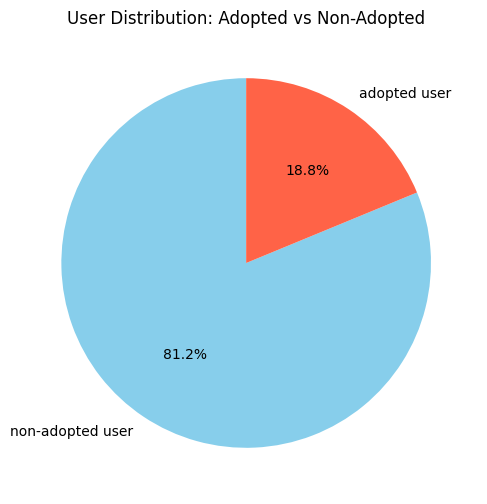

In [26]:
# Total count of each group
df_final['adoption_status'].value_counts()

# Percentage of each group
df_final['adoption_status'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

# Get the counts of each adoption status
adoption_counts = df_final['adoption_status'].value_counts()

# Create the figure for the chart
plt.figure(figsize=(6, 6))

# Create the pie chart
plt.pie(adoption_counts,
        labels=adoption_counts.index,
        autopct='%1.1f%%',   # Show percentages with 1 decimal place
        startangle=90,       # Start the pie chart from 90 degrees
        colors=['skyblue', 'tomato'])

# Add title
plt.title("User Distribution: Adopted vs Non-Adopted")

# Show the chart
plt.show()

# Adopted Users Evolution Over Time

## Create "Adopted_Date" Variable
Create a variable called “adopted_date” – record the first date on which each user logged in for the third time within a 7-day period.

To understand when users became adopted users over time, we need to know the date on which that happened.


In [27]:
# List to store adopted users with their adoption date
adopted_user_dates = []

# Generate adopted_date based on adoption criteria
for _, row in df_final[df_final['adoption_status'] == 'adopted user'].iterrows():
    user_id = row['user_id']
    login_dates = row['login_time_stamps']

    # Ensure dates are in datetime format and sorted
    login_dates = sorted(pd.to_datetime(login_dates))

    # Look for a window of 3 logins within 7 days
    for i in range(len(login_dates) - 2):
        if (login_dates[i+2] - login_dates[i]).days <= 7:
            adopted_user_dates.append({'user_id': user_id, 'adopted_date': login_dates[i+2]})
            break

# Create final DataFrame
df_adopted_dates = pd.DataFrame(adopted_user_dates)

print(df_adopted_dates)

      user_id        adopted_date
0           2 2014-02-09 03:45:04
1          10 2013-02-06 22:08:03
2          20 2014-03-13 11:46:38
3          33 2014-03-23 06:29:09
4          42 2012-12-25 19:05:07
...       ...                 ...
1651    11965 2014-05-02 07:17:35
1652    11967 2014-03-10 08:12:37
1653    11969 2013-06-03 00:48:14
1654    11975 2013-05-29 11:10:11
1655    11988 2014-03-19 11:04:47

[1656 rows x 2 columns]


## Generate The Evolution Graph


<ipython-input-28-94ed3de064f1>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  adoption_quarterly = df_adopted_dates.groupby(pd.Grouper(key='adopted_date', freq='Q')).size()


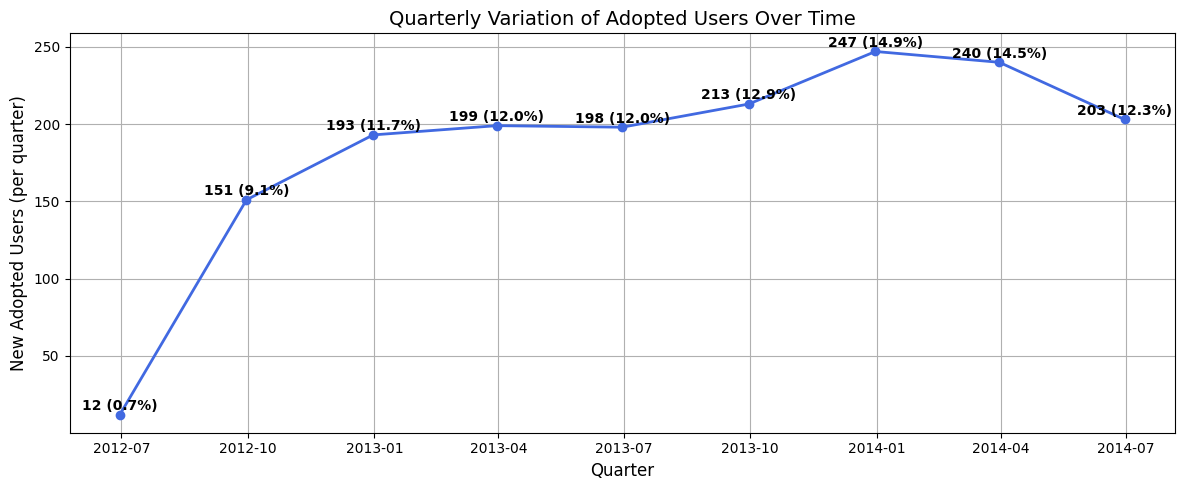

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format
df_adopted_dates['adopted_date'] = pd.to_datetime(df_adopted_dates['adopted_date'])

# Group by quarter
adoption_quarterly = df_adopted_dates.groupby(pd.Grouper(key='adopted_date', freq='Q')).size()

# Total number of adopted users (to calculate percentages)
total_adopted = adoption_quarterly.sum()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(adoption_quarterly.index, adoption_quarterly.values, color='royalblue', linewidth=2, marker='o')

# Add labels with values and percentages
for i, (date, value) in enumerate(adoption_quarterly.items()):
    percent = (value / total_adopted) * 100
    label = f'{value} ({percent:.1f}%)'
    plt.text(date, value + 1, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and axes
plt.title('Quarterly Variation of Adopted Users Over Time', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('New Adopted Users (per quarter)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Adopted Users By Type Of Association

<ipython-input-29-0af6db28f6e2>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='pastel')


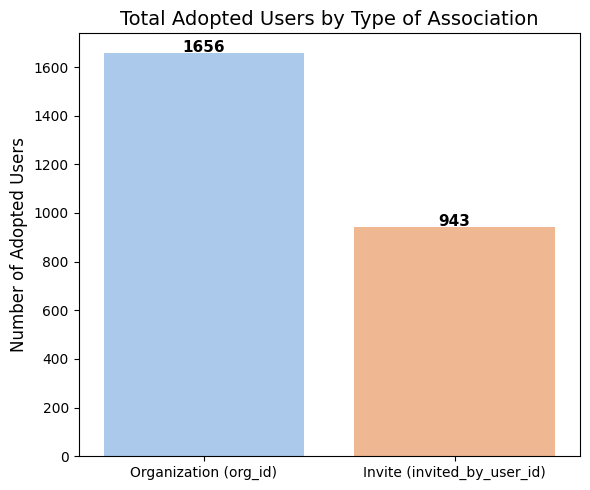

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# Total adopted users by organization (just counting those with org_id)
total_by_org = adopted_only['org_id'].notnull().sum()

# Total adopted users who were invited by another user
total_by_invites = adopted_only['invited_by_user_id'].notnull().sum()

# Prepare data
labels = ['Organization (org_id)', 'Invite (invited_by_user_id)']
values = [total_by_org, total_by_invites]

# Bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x=labels, y=values, palette='pastel')

# Add value labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

# Titles and axes
plt.title('Total Adopted Users by Type of Association', fontsize=14)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.show()

<ipython-input-30-fb636723dd5e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org_counts.index[:10].astype(str), y=org_counts.values[:10], palette='Blues_d')


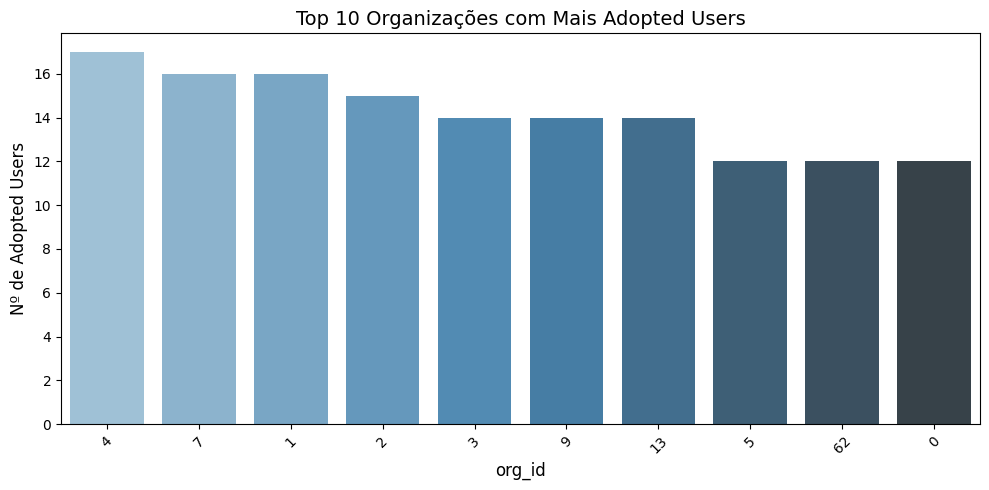

<ipython-input-30-fb636723dd5e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=invited_counts.index[:10].astype(int).astype(str), y=invited_counts.values[:10], palette='Greens_d')


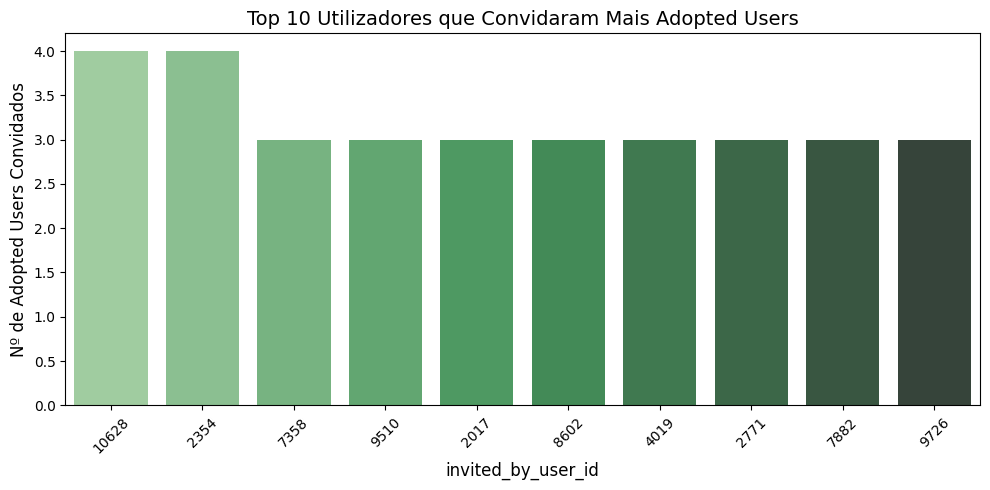

In [30]:
# Filtrar apenas adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

import matplotlib.pyplot as plt
import seaborn as sns

# Contar adopted users por organização
org_counts = adopted_only['org_id'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=org_counts.index[:10].astype(str), y=org_counts.values[:10], palette='Blues_d')
plt.title('Top 10 Organizações com Mais Adopted Users', fontsize=14)
plt.xlabel('org_id', fontsize=12)
plt.ylabel('Nº de Adopted Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remover valores nulos (usuários não convidados por ninguém)
invited_counts = adopted_only.dropna(subset=['invited_by_user_id'])
invited_counts = invited_counts['invited_by_user_id'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=invited_counts.index[:10].astype(int).astype(str), y=invited_counts.values[:10], palette='Greens_d')
plt.title('Top 10 Utilizadores que Convidaram Mais Adopted Users', fontsize=14)
plt.xlabel('invited_by_user_id', fontsize=12)
plt.ylabel('Nº de Adopted Users Convidados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Adopted Users by Creation Source

<ipython-input-31-9653c93a5e5d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=creation_counts.index, y=creation_counts.values, palette='Blues_d')


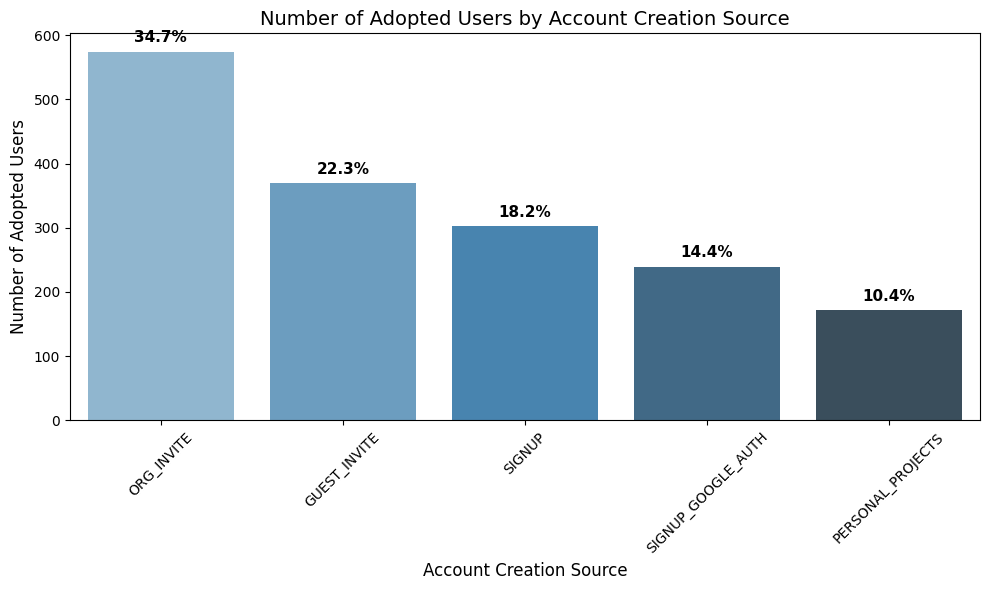

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# 2. Count and calculate percentages
creation_counts = adopted_only['creation_source'].value_counts().sort_values(ascending=False)
creation_percent = (creation_counts / creation_counts.sum()) * 100

# 3. Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=creation_counts.index, y=creation_counts.values, palette='Blues_d')

# 4. Add percentage labels on top of each bar
for i, (count, pct) in enumerate(zip(creation_counts.values, creation_percent.values)):
    ax.text(i, count + 10, f'{pct:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 5. Titles and axes
plt.title('Number of Adopted Users by Account Creation Source', fontsize=14)
plt.xlabel('Account Creation Source', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Time Of Adopted Users By Creation Source

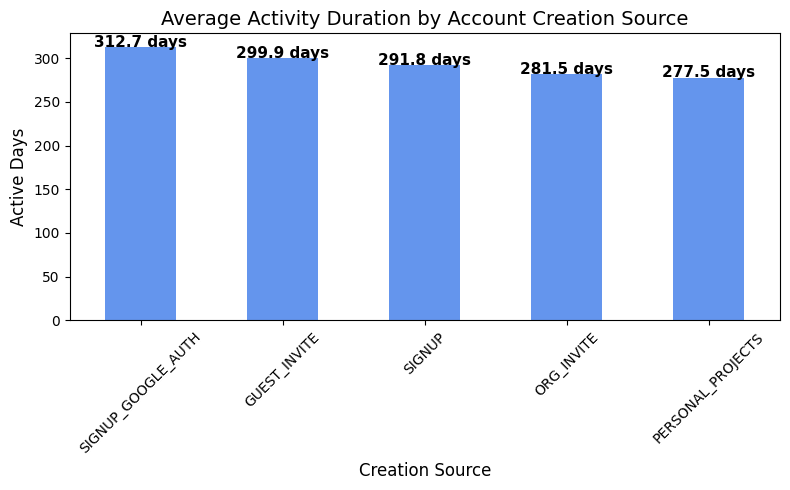

In [32]:
# 1. Filter adopted users
adopted_ids = df_final[df_final['adoption_status'] == 'adopted user']['user_id']

# 2. Filter only the login records of adopted users
adopted_engagement = data_engage[data_engage['user_id'].isin(adopted_ids)].copy()

# 3. Reset index (in case time_stamp is set as index)
adopted_engagement = adopted_engagement.reset_index()

# 4. Ensure datetime format
adopted_engagement['time_stamp'] = pd.to_datetime(adopted_engagement['time_stamp'])

# 5. Calculate user lifetime: last login - first login
user_lifetime = adopted_engagement.groupby('user_id')['time_stamp'].agg(['min', 'max'])
user_lifetime['lifetime_days'] = (user_lifetime['max'] - user_lifetime['min']).dt.days

# 6. Reset index and merge with df_final to get user metadata
user_lifetime = user_lifetime[['lifetime_days']].reset_index()
engagement_summary = pd.merge(user_lifetime, df_final, on='user_id', how='left')

# 7. Calculate average activity duration per creation source
creation_stats = engagement_summary.groupby('creation_source')['lifetime_days'].mean().sort_values(ascending=False)

# 8. Bar chart with labels
plt.figure(figsize=(8, 5))
ax = creation_stats.plot(kind='bar', color='cornflowerblue')

# Add value labels on top of the bars
for i, v in enumerate(creation_stats.values):
    ax.text(i, v + 0.5, f'{v:.1f} days', ha='center', fontsize=11, fontweight='bold')

plt.title('Average Activity Duration by Account Creation Source', fontsize=14)
plt.ylabel('Active Days', fontsize=12)
plt.xlabel('Creation Source', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Adopted Users By Mailing List Subscription and Marketing Drip Participation

<ipython-input-33-41934c0e6e3d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-33-41934c0e6e3d>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


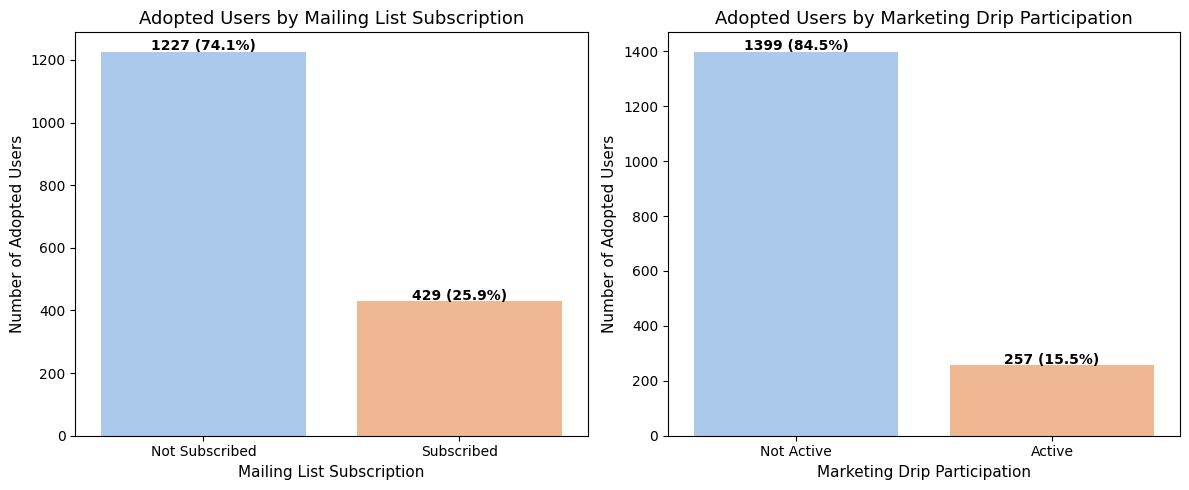

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only adopted users
adopted_only = df_final[df_final['adoption_status'] == 'adopted user']

# Data for mailing list subscription
mailing_counts = adopted_only['opted_in_to_mailing_list'].value_counts()
total_mailing = mailing_counts.sum()

# Data for marketing drip participation
drip_counts = adopted_only['enabled_for_marketing_drip'].value_counts()
total_drip = drip_counts.sum()

# Side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Mailing list subscription
sns.barplot(
    x=mailing_counts.index.map({0: 'Not Subscribed', 1: 'Subscribed'}),
    y=mailing_counts.values,
    palette='pastel',
    ax=axes[0]
)
axes[0].set_title('Adopted Users by Mailing List Subscription', fontsize=13)
axes[0].set_ylabel('Number of Adopted Users', fontsize=11)
axes[0].set_xlabel('Mailing List Subscription', fontsize=11)

for i, val in enumerate(mailing_counts.values):
    pct = (val / total_mailing) * 100
    label = f"{val} ({pct:.1f}%)"
    axes[0].text(i, val + 5, label, ha='center', fontsize=10, fontweight='bold')

# Plot 2: Marketing drip participation
sns.barplot(
    x=drip_counts.index.map({0: 'Not Active', 1: 'Active'}),
    y=drip_counts.values,
    palette='pastel',
    ax=axes[1]
)
axes[1].set_title('Adopted Users by Marketing Drip Participation', fontsize=13)
axes[1].set_ylabel('Number of Adopted Users', fontsize=11)
axes[1].set_xlabel('Marketing Drip Participation', fontsize=11)

for i, val in enumerate(drip_counts.values):
    pct = (val / total_drip) * 100
    label = f"{val} ({pct:.1f}%)"
    axes[1].text(i, val + 5, label, ha='center', fontsize=10, fontweight='bold')

# Final layout
plt.tight_layout()
plt.show()

#📈PREDICTIVE MODELING
Identify which factors influence the likelihood of a user becoming an adopted user. Predict whether a user will become an adopted user (1 = yes, 0 = no), based on variables such as creation_source, org_id, opted_in_to_mailing_list, etc. In other words, this is a binary classification problem.

##💡Recommended Modeling Approach:
```
Prioritize Interpretability:

*  Logistic Regression to understand the impact of each variable through   
   coefficient analysis.
*  Decision Tree to visualize clear decision rules and feature splits.

```

```
Prioritize Predictive Performance:

*   Random Forest as a strong balance between performance and simplicity.
*   XGBoost for fine-tuned, high-performance modeling when precision is
    critical.
```

#📈Logistic Regression

#🔹 Step 1 – Prepare the Data
Define the target variable and select useful features

In [34]:
# Target variable
df_final['adopted'] = df_final['adoption_status'].apply(lambda x: 1 if x == 'adopted user' else 0)

# Feature: whether the user was invited
df_final['was_invited'] = df_final['invited_by_user_id'].notnull().astype(int)

# Selected features
features = [
    'creation_source',
    'org_id',
    'opted_in_to_mailing_list',
    'enabled_for_marketing_drip',
    'was_invited'
]

# Dataset with features + target
df_model = df_final[features + ['adopted']].copy()

# One-hot encoding for the categorical variable (creation_source)
df_model = pd.get_dummies(df_model, columns=['creation_source'], drop_first=True)

#🔹 Step 2 – Split Data into Training and Test Sets
To evaluate the model’s performance on unseen data, we split the dataset into training and test subsets.

In [35]:
from sklearn.model_selection import train_test_split

# Define feature matrix (X) and target vector (y)
X = df_model.drop('adopted', axis=1)
y = df_model['adopted']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#🔹 Step 3 – Train the Model
Train a Logistic Regression model using the training data to learn the relationship between user features and the probability of adoption.

In [36]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model with default regularization (L2)
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#🔹 Step 4 – Evaluate the model

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1417    0]
 [ 348    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1417
           1       0.00      0.00      0.00       348

    accuracy                           0.80      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.64      0.80      0.72      1765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#🔹Step 5 – Interpret the Coefficients (Impact of Each Feature)

In [38]:
import pandas as pd

coef = pd.Series(model.coef_[0], index=X.columns)
coef = coef.sort_values(ascending=False)

print(coef)

enabled_for_marketing_drip            0.067713
opted_in_to_mailing_list              0.066776
org_id                                0.001391
was_invited                          -0.117140
creation_source_PERSONAL_PROJECTS    -0.201938
creation_source_ORG_INVITE           -0.257280
creation_source_SIGNUP_GOOGLE_AUTH   -0.459333
creation_source_SIGNUP               -0.550851
dtype: float64


#🔹Step 6 – Plot the Coefficients
Positive coefficient → increases the probability of adoption
Negative coefficient → decreases the probability of adoption

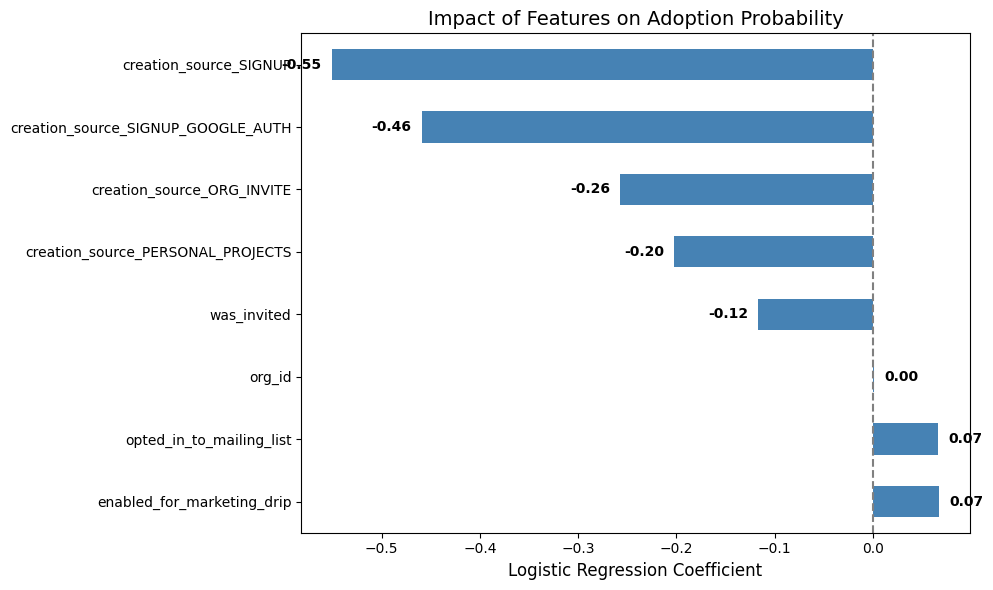

In [48]:
# Create the figure
plt.figure(figsize=(10, 6))

# Plot the coefficients as a horizontal bar chart
coef.plot(kind='barh', color='steelblue')

# Add value labels to each bar
for i, value in enumerate(coef.values):
    plt.text(
        value + 0.01 if value > 0 else value - 0.01,  # adjust position based on direction
        i,  # vertical position
        f'{value:.2f}',  # format coefficient value
        va='center',
        ha='left' if value > 0 else 'right',
        fontsize=10,
        fontweight='bold'
    )

# Add chart titles and formatting
plt.title('Impact of Features on Adoption Probability', fontsize=14)
plt.xlabel('Logistic Regression Coefficient', fontsize=12)
plt.axvline(0, color='gray', linestyle='--')  # vertical line at zero
plt.tight_layout()
plt.show()

| **Feature**                          | **Coefficient**       | **Interpretation** |
|--------------------------------------|------------------------|---------------------|
| `creation_source_SIGNUP`             | ❌ **Strong Negative** | Users who sign up directly are **less likely** to adopt |
| `creation_source_SIGNUP_GOOGLE_AUTH` | ❌ **Strong Negative** | Also less likely — possibly due to **onboarding friction via Google** |
| `creation_source_ORG_INVITE`         | ❌ **Moderate Negative** | Surprisingly negative — possibly due to **large inactive orgs** |
| `creation_source_PERSONAL_PROJECTS`  | ❌ **Slight Negative** | Small negative effect — not significant |
| `was_invited`                        | ❌ **Slight Negative** | Unexpected — invited users are **not necessarily more engaged** |
| `org_id`                             | ❌ **Slight Negative** | Likely acting as **noise** (many varied orgs) |
| `opted_in_to_mailing_list`           | ✅ **Positive**        | Users who accepted marketing emails are **more likely to adopt** |
| `enabled_for_marketing_drip`         | ✅ **Slight Positive** | Marketing drip **helps slightly** — possibly low conversion content |

✅** Factors that Increase Adoption Probability**

On the positive side, users who opted into marketing emails (opted_in_to_mailing_list) are more likely to adopt. This suggests that users who are open to communications from the company tend to show higher levels of interest and engagement.

Additionally, participation in the marketing drip campaign (enabled_for_marketing_drip) has a slight positive impact on adoption. While the effect is small, it indicates that marketing automation has some benefit — though perhaps the campaign content could be improved to drive stronger results.

# 📈Decision Tree

#🔹Step 1 – Data Preparation

In [40]:
# Target variable
df_final['adopted'] = df_final['adoption_status'].apply(lambda x: 1 if x == 'adopted user' else 0)

# Binary feature: invited or not
df_final['was_invited'] = df_final['invited_by_user_id'].notnull().astype(int)

# Selected features
features = [
    'creation_source',
    'org_id',
    'opted_in_to_mailing_list',
    'enabled_for_marketing_drip',
    'was_invited'
]

df_model = df_final[features + ['adopted']].copy()

# One-hot encoding of the categorical variable
df_model = pd.get_dummies(df_model, columns=['creation_source'], drop_first=True)

#🔹Step 2 – Split the data into training and testing sets.

In [41]:
from sklearn.model_selection import train_test_split

X = df_model.drop('adopted', axis=1)
y = df_model['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#🔹Step 3 – Train the Decision Tree model

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Criar a árvore com limite de profundidade para evitar overfitting
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#🔹Step 4 – Model Evaluation

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1417    0]
 [ 348    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1417
           1       0.00      0.00      0.00       348

    accuracy                           0.80      1765
   macro avg       0.40      0.50      0.45      1765
weighted avg       0.64      0.80      0.72      1765



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#🔹Step 5 – Visualize the Decision Tree

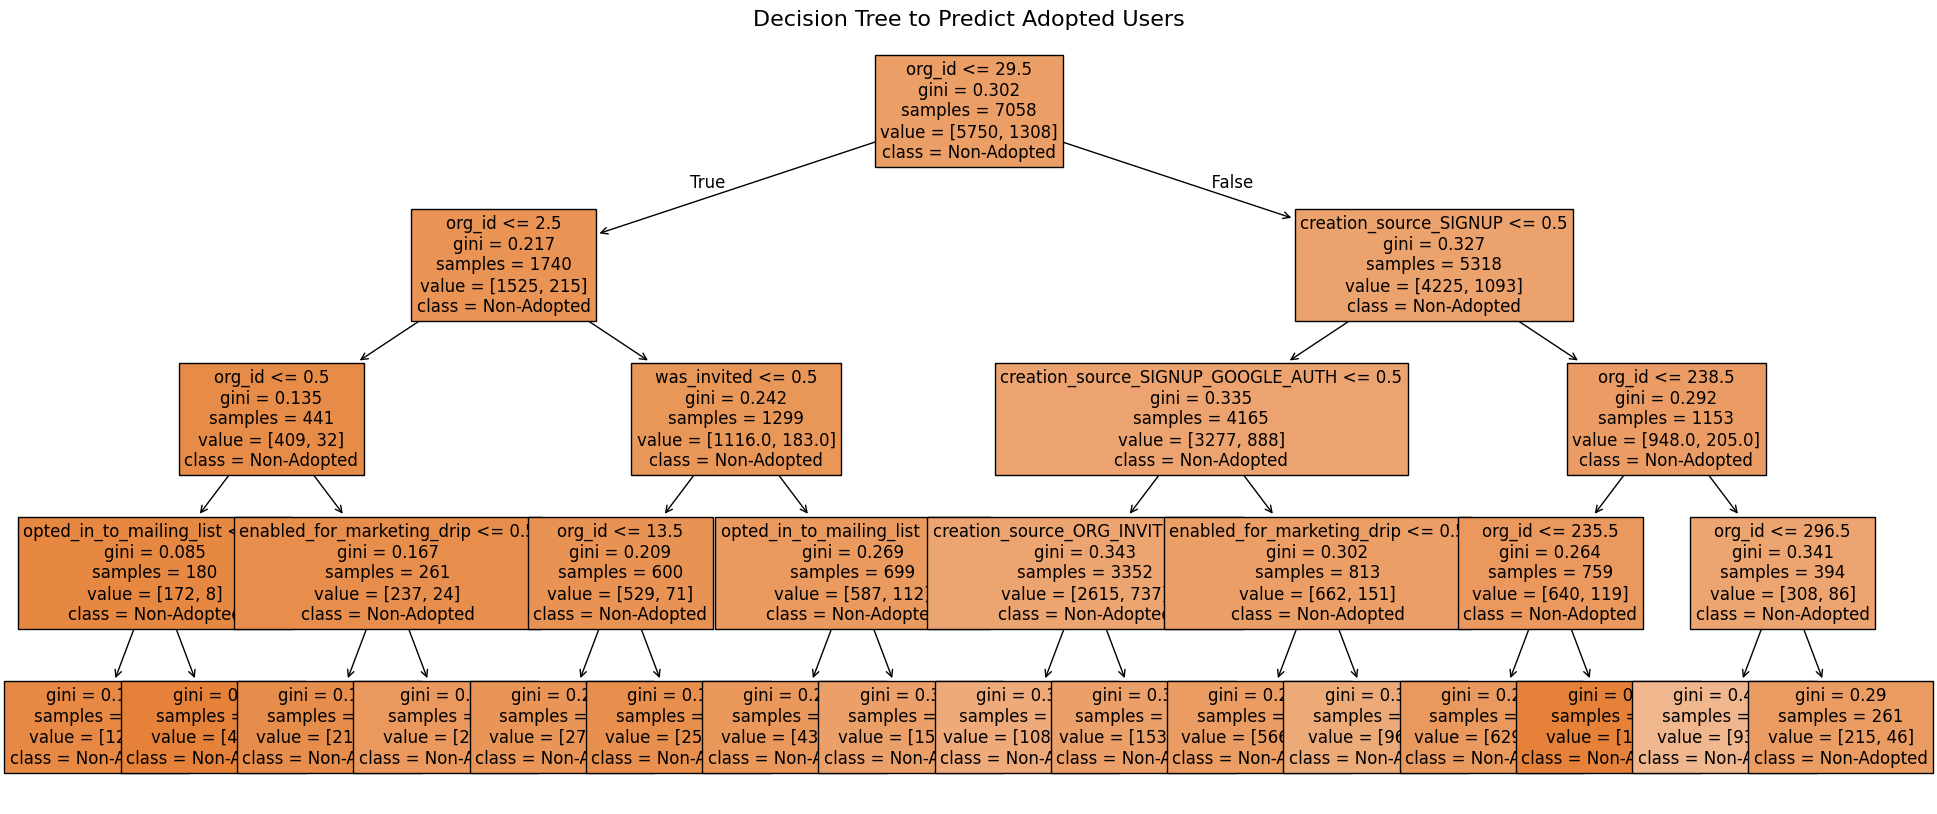

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 10))  # Also increases the figure size
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['Non-Adopted', 'Adopted'],
    filled=True,
    fontsize=12  # ← Increase text size
)
plt.title("Decision Tree to Predict Adopted Users", fontsize=16)
plt.show()

✅** Factors that Increase Adoption Probability**

The most important variable is org_id

The first split in the tree is based on org_id <= 29.5, which indicates that this identifier is capturing some kind of pattern.

This doesn’t necessarily mean that the organization ID has inherent meaning, but rather that it might be acting as a proxy for user behavior patterns — for example, some organizations may have more engaged users than others.

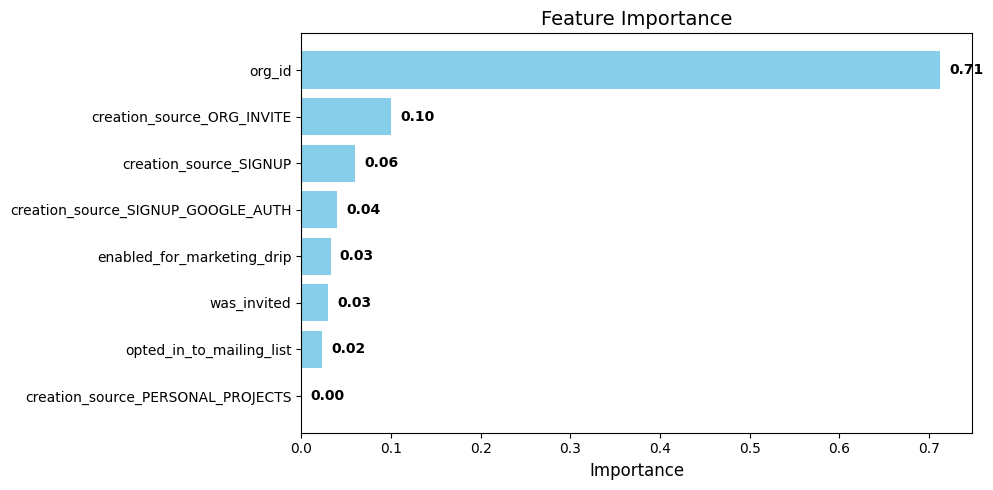

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar série de importância
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)  # Para alinhar melhor com o eixo Y

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(feature_importance.index, feature_importance.values, color='skyblue')
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance", fontsize=12)

# Adicionar rótulos nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

✅** Factors that Increase Adoption Probability**

The Feature Importance chart also confirms that org_id carries the highest weight (above 0.7), far more than any other variable.

# 📈Random Forest
#🔹Step 1 – Import Required Libraries

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#🔹Step 2 – Define Features and Target Variable

In [53]:
# Features
X = df_model.drop('adopted', axis=1)

# Target variable
y = df_model['adopted']

#🔹Step 3 – Split Data into Training and Testing Sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#🔹Step 4 – Train the Random Forest Model

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#🔹Step 5 – Train the Random Forest Model

In [56]:
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1898  252]
 [ 427   70]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2150
           1       0.22      0.14      0.17       497

    accuracy                           0.74      2647
   macro avg       0.52      0.51      0.51      2647
weighted avg       0.70      0.74      0.72      2647



#🔹Step 6 – Feature Importance Plot

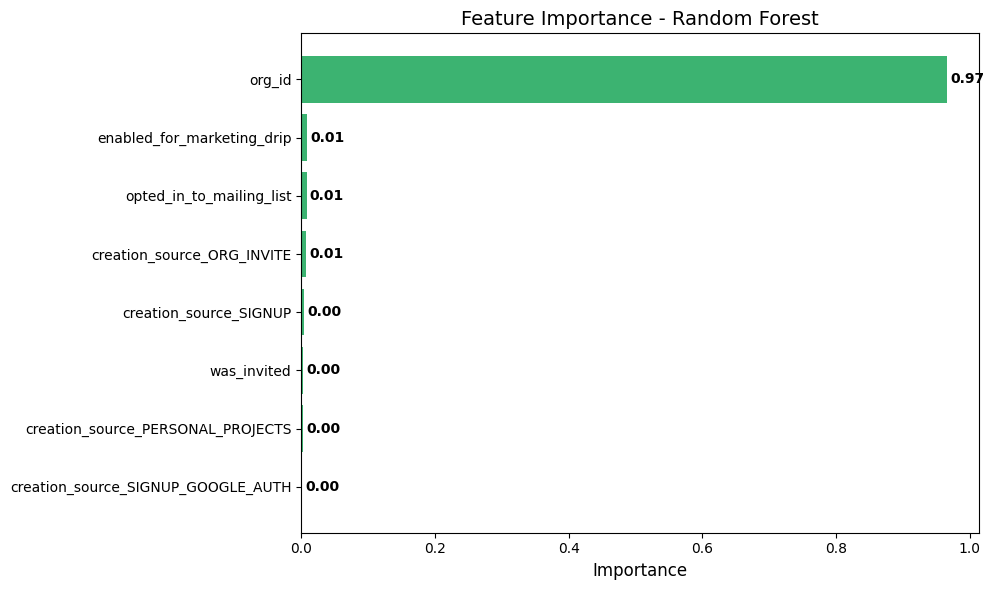

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance.index, feature_importance.values, color='mediumseagreen')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()


✅** Factors that Increase Adoption Probability**

org_id dominates prediction

With an importance score of 0.97, org_id is by far the most influential feature in determining whether a user becomes an adopted user.

This likely indicates that certain organizations have user behavior patterns that heavily influence adoption.

⚠️ Caution: This may not mean org_id has semantic meaning, but rather that it acts as a proxy for organizational behavior (e.g., highly engaged orgs vs inactive ones).

#📈Random Forest Without org_id

#🔹Step 1 - Drop org_id from the dataset

In [58]:
# Remove org_id from features
X_no_org = df_model.drop(columns=['adopted', 'org_id'])
y = df_model['adopted']

#🔹Step 2 - Split into train and test sets

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_no_org, y, test_size=0.3, random_state=42, stratify=y
)

#🔹Step 3 - Train the Random Forest model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_model_no_org = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_no_org.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#🔹Step 4 - Evaluate the model

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_no_org = rf_model_no_org.predict(X_test)

print(confusion_matrix(y_test, y_pred_no_org))
print(classification_report(y_test, y_pred_no_org))

[[2150    0]
 [ 497    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2150
           1       0.00      0.00      0.00       497

    accuracy                           0.81      2647
   macro avg       0.41      0.50      0.45      2647
weighted avg       0.66      0.81      0.73      2647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#🔹Step 5 - Feature Importance Plot (no org_id)

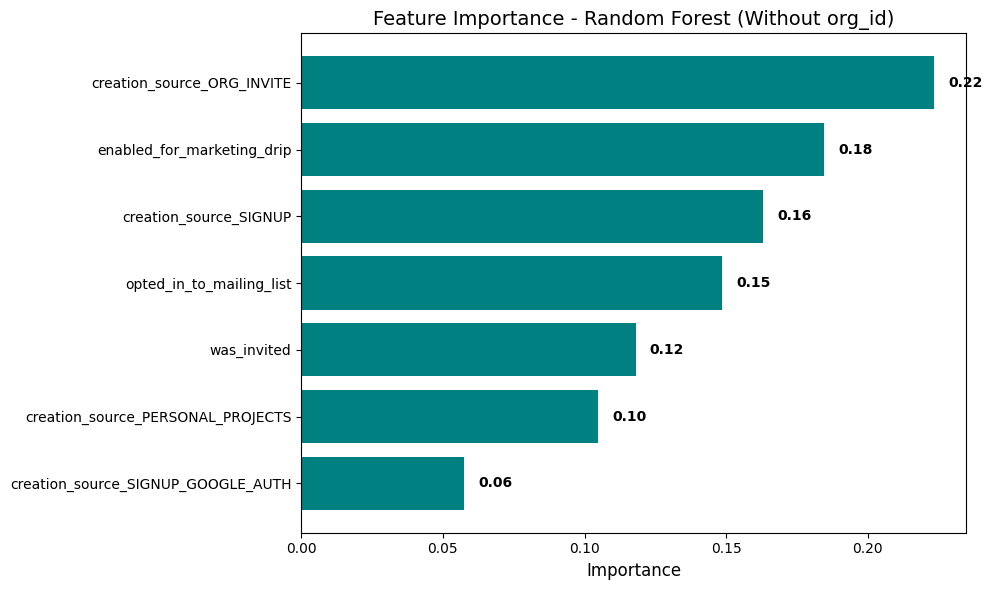

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
feature_importance_no_org = pd.Series(
    rf_model_no_org.feature_importances_, index=X_no_org.columns
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_no_org.index, feature_importance_no_org.values, color='teal')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.title("Feature Importance - Random Forest (Without org_id)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()


Without org_id, the model now focuses on more meaningful and actionable behavioral features — especially invitation type (creation_source_ORG_INVITE) and marketing engagement (enabled_for_marketing_drip).

This is a healthier signal of adoption drivers, and gives a better basis for strategic decisions (like optimizing onboarding or marketing campaigns).

#📈XGBoost Classifier

#🔹Step 1 - Install

In [63]:
pip install xgboost

#🔹Step 2 - Train the model

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variables
X = df_model.drop(columns=['adopted'])  # features
y = df_model['adopted']                 # target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:22:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

#🔹Step 3 - Model Evaluation

In [66]:
y_pred = xgb_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2120   30]
 [ 489    8]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2150
           1       0.21      0.02      0.03       497

    accuracy                           0.80      2647
   macro avg       0.51      0.50      0.46      2647
weighted avg       0.70      0.80      0.73      2647



#🔹Step 4 - Feature Importance

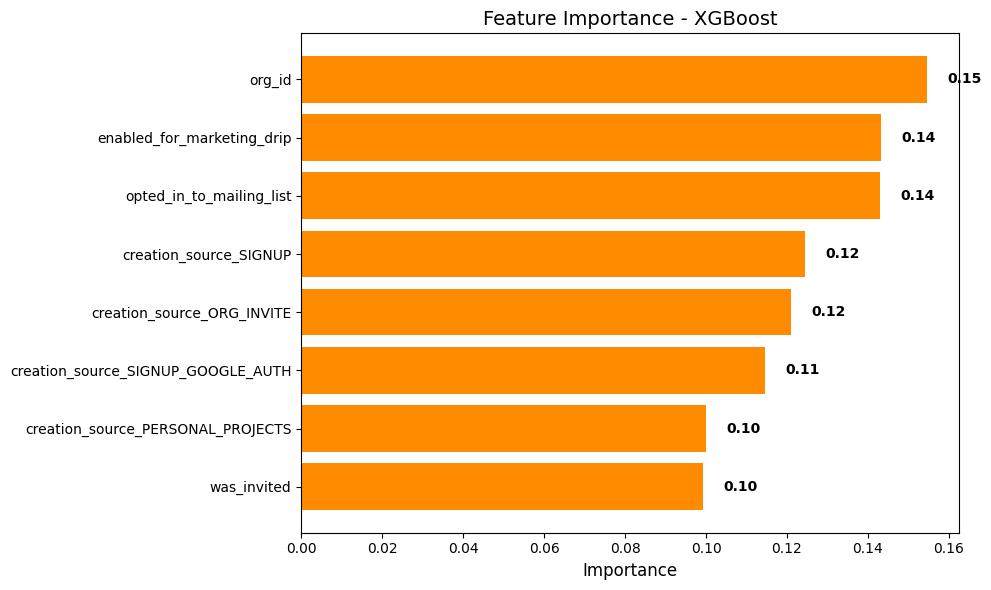

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(xgb_importance.index, xgb_importance.values, color='darkorange')

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.title('Feature Importance - XGBoost', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

Strong Influence of org_id: The variable org_id has the highest feature importance, accounting for 0.15. This suggests that the organization ID plays a significant role in predicting the target variable (adoption). However, this might also indicate that the model is overfitting on this feature, especially if there are many organizations with a small number of users.

Behavioral and Engagement Features Are Important: Variables like enabled_for_marketing_drip, opted_in_to_mailing_list, and creation_source_* (including SIGNUP, GOOGLE_AUTH, and PERSONAL_PROJECTS) are also highly important (0.14-0.10). These features seem to reflect the user's engagement and behavior, indicating that these are important for predicting user adoption.

#📈XGBoost Classifier (Without org_id)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:41:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


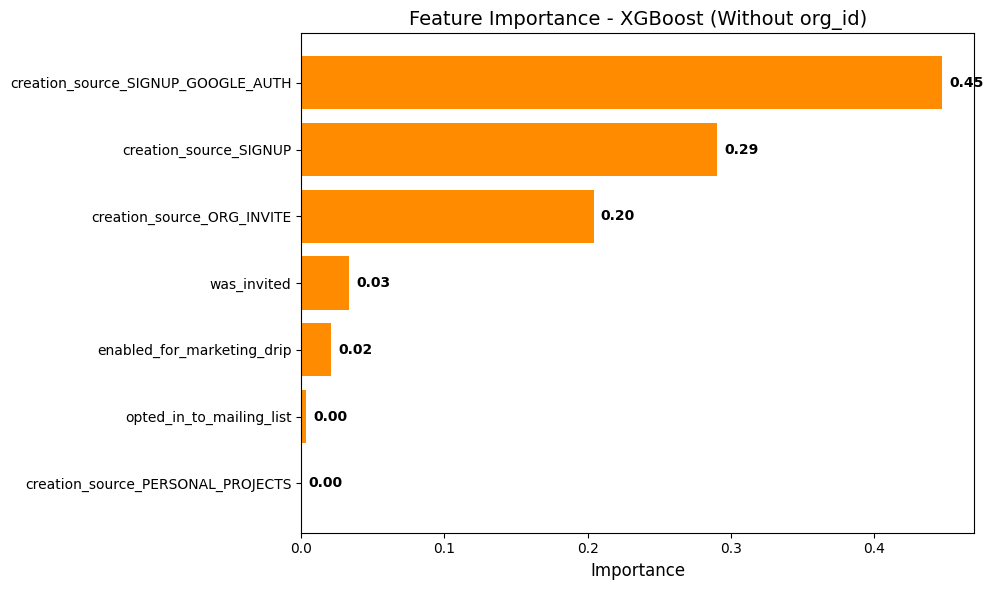

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

# 1. Select features (excluding org_id)
features_no_org = [col for col in df_model.columns if col not in ['org_id', 'adopted']]
X_no_org = df_model[features_no_org]
y = df_model['adopted']

# 2. Train XGBoost model
xgb_model_no_org = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_no_org.fit(X_no_org, y)

# 3. Get feature importances
xgb_importance_no_org = pd.Series(xgb_model_no_org.feature_importances_, index=X_no_org.columns)
xgb_importance_no_org = xgb_importance_no_org.sort_values(ascending=True)

# 4. Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(xgb_importance_no_org.index, xgb_importance_no_org.values, color='darkorange')

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             va='center', fontsize=10, fontweight='bold')

# Final plot details
plt.title("Feature Importance - XGBoost (Without org_id)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()

*   The creation source plays a dominant role in predicting adoption.
*   Google Auth and direct signup users are particularly important.
*   User invitations and marketing signals have limited predictive power.
*   Excluding org_id gives a clearer picture of actual user behavior, not just organizational bias.


#📌Overall Conclusion
**org_id**
- Very strong predictor in Decision Tree, Random Forest, and XGBoost (when included).

- It consistently dominated the feature importance charts.

- ⚠️ However, it's likely acting as a proxy for organizational behavior, not as a causal factor (e.g., some orgs are more engaged than others).

- Best practice: Avoid over-relying on org_id for generalization; test models with and without it (as you did ✅).

**When org_id is removed, what truly matters?**

creation_source

    🔥 Most consistent true predictor across all models:

        Logistic Regression: all creation_source variants had noticeable coefficients (positive or negative).

        Decision Tree & Random Forest: used frequently to split nodes.

        XGBoost (no org_id): top features were creation_source_SIGNUP_GOOGLE_AUTH, SIGNUP, and ORG_INVITE.

    Interpretation:

        Users signing up via Google Auth or directly are more likely to adopt in XGBoost and Random Forest.

        Logistic Regression suggested the opposite — this may be due to multicollinearity or feature interactions.

3. Marketing features:

    enabled_for_marketing_drip and opted_in_to_mailing_list

    🟡 Mixed importance:

        Logistic Regression: positive but weak coefficients.

        Decision Tree & Random Forest: minor but present in splits.

        XGBoost: low importance (especially with org_id removed).

    Conclusion: these variables help a little, but are not primary drivers of adoption.

4. was_invited (invited_by_user_id)

    Slightly negative in Logistic Regression, weakly important elsewhere.

    Surprising result: being invited doesn’t necessarily lead to higher adoption.

    May reflect that invited users don't always feel ownership or urgency.